In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import load_iris
import numpy as np
import random

In [2]:
original_data = load_iris()
N = len(original_data.data)
print('Total points:', N)

Total points: 150


In [3]:
X = original_data.data
y = original_data.target
X_features = original_data.feature_names
y_targets = original_data.target_names

In [4]:
# distance and angle function
def euclidian_distance(pt1, pt2):
    diff = pt1 - pt2
    return np.sqrt(np.dot(diff, diff))


def angle(pt1, pt2):
    inner = np.inner(pt1, pt2)
    norm = np.linalg.norm(pt1) * np.linalg.norm(pt2)
    cos = inner / norm
    rad =  np.arccos(np.clip(cos, -1.0, 1.0))
    return np.rad2deg(rad)

In [5]:


def cost_matrix(data, cost_fn):
    h, _ = data.shape
    # print(h)
    cost_matrix = np.zeros((h, h))
    for x in range(h):
        for y in range(x, h):
            # dist = euclidian_distance(data.iloc[x], data.iloc[y])
            dist = cost_fn(data[x], data[y])
            cost_matrix[x][y], cost_matrix[y][x] = dist, dist
    return cost_matrix

def mst(data):
    h, _ = data.shape
    INF = 9999999
    cm = cost_matrix(data, angle)
    # print(cm)
    snode = np.zeros(h)
    nedges = 0
    snode[0] = True

    palist = []
    pblist = []
    cost = []
    while nedges < h - 1:
        min = INF
        a, b = 0, 0
        for m in range(h):
            if snode[m]:
                for n in range(h):
                    if (not snode[n]) and cm[m][n]:
                        # not in selected and there is an edge
                        if min > cm[m][n]:
                            min = cm[m][n]
                            a = m
                            b = n
        # print(str(a) + "-" + str(b) + ":" + str(cm[a][b]))
        palist.append(a)
        pblist.append(b)
        cost.append(cm[a][b])
        snode[b] = True
        nedges += 1
    srtd = sorted(zip(cost, zip(palist, pblist)))
    edges = [st[1] for st in srtd]
    cst = [st[0] for st in srtd]
    return edges, cst, srtd

In [6]:
# get MST edges and cost
edges, cst, _ = mst(X)

In [7]:
P_prime = [[0,0] for i in range(N)]
C_set = [{i: [0,0]} for i in range(N)]

def get_component(components, point):
    for i in range(len(components)):
        if point in components[i]:
            return i;

def rotation(component, convex = True):
    # TODO - rotate component along origin

    return component

def align_hull_wrapper( component, p_index, convex = True):
    # center the component to origin on point
    point = component[p_index]
    for i in component:
        component[i] = [component[i][0] - point[0], component[i][1] - point[1]]

    if len(component) == 1:
        pass
    elif convex:
        # for valley
        component = rotation(component, convex)
        pass
    else:
        # for hill
        component = rotation(component, convex)
        pass

    # get back the original position
    for i in component:
        component[i] = [component[i][0] + point[0], component[i][1] + point[1]]
    return component

def join_r2(ca, cb, pa_index, pb_index, el):

    # align hulls
    ca = align_hull_wrapper(ca, pa_index)
    cb = align_hull_wrapper(cb, pb_index, False)

    # points
    pa_point = ca[pa_index]
    pb_point = cb[pb_index]

    # take pa_point to required pb_point
    pa_point[1] += el

    diff_x, diff_y = pa_point[0] - pb_point[0], pa_point[1] - pb_point[1]

    for i in cb:
        cb[i][0] += diff_x
        cb[i][1] += diff_y
    return ca, cb;

for i in range (N-1):
    # points
    pa_index, pb_index = edges[i]
    edge_len = cst[i]

    # components
    ca_index, cb_index = get_component(C_set, pa_index), get_component(C_set, pb_index)
    comp_a = C_set[ca_index]
    comp_b = C_set[cb_index]

    # plot in R2-plane
    comp_a, comp_b = join_r2(comp_a, comp_b, pa_index, pb_index, edge_len)

    C_set[ca_index] = comp_a
    C_set[cb_index] = comp_b

    C_set[ca_index].update(C_set[cb_index])
    del C_set[cb_index]

['#22CEDA', '#0F1626', '#6B0ED8']


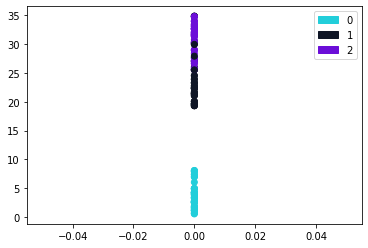

In [8]:
def random_colors(size):
    return ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(size)]

def plot_map(data, label):
    X = []
    Y = []
    color = []
    uniq_labels = np.unique(label)
    colors = random_colors(len(uniq_labels))
    print(colors)
    for dt in data:
        for i in dt:
            X.append(dt[i][0])
            Y.append(dt[i][1])
            color.append(colors[label[i]])

    patches = []
    for i in range(len(uniq_labels)):
        pcolor = colors[i]
        label = i
        patch = mpatches.Patch(color=pcolor, label=label)
        patches.append(patch)
    plt.legend(handles=patches)
    plt.scatter(X, Y, c=color)
plot_map(C_set, y)